# DA21-C ML Assignment 4


You have given a relevant dataset about various properties in the USA. Your task is to identify the habitability score of the property. Create a linear regression model to complete this task.

Note: Take only numerical columns into account. Ignore the categorical column.

In [235]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [236]:
df = pd.read_csv('Housing Habitability Data.csv')
df.head().T

,0,1,2,3,4
Property_ID,0x21e3,0x68d4,0x7d81,0x7a57,0x9409
Property_Type,Apartment,Apartment,Apartment,Apartment,Bungalow
Property_Area,106,733,737,900,2238
Number_of_Windows,NaN,2.0,4.0,3.0,14.0
Number_of_Doors,1,2,2,2,6
Furnishing,Semi_Furnished,Unfurnished,Fully Furnished,Unfurnished,Fully Furnished
Frequency_of_Powercuts,0.0,1.0,0.0,2.0,0.0
Power_Backup,No,No,No,Yes,No
Water_Supply,Once in a day - Morning,Once in a day - Evening,Once in a day - Morning,Once in a day - Morning,All time
Traffic_Density_Score,5.89,4.37,7.45,6.16,5.46


In [237]:
df.drop("Property_ID",axis=1,inplace=True)

In [238]:
num_col = df.columns.to_list()

for i in df.columns:
    try:
        df[i].astype(float)
    except ValueError:
        num_col.remove(i)



In [239]:
cat_col = set(df.columns) - set(num_col)
cat_col


{'Crime_Rate',
 'Dust_and_Noise',
 'Furnishing',
 'Power_Backup',
 'Property_Type',
 'Water_Supply'}

In [240]:
noise=[]
for i in num_col:
    
    for j in df[i]:
        try:
            float(j)
        except:
            noise.append(j)
print(set(noise))

set()


In [241]:
for i in num_col:
    mean = df[i].mean()
    df[i].fillna(mean,inplace=True)

In [242]:
for i in cat_col:
    df[i].fillna(method='ffill',inplace=True)

In [243]:
for i in cat_col:
    print(i)
    print(df[i].unique())

Water_Supply
['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
Dust_and_Noise
['Medium' 'High' 'Low']
Furnishing
['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
Power_Backup
['No' 'Yes' 'NOT MENTIONED']
Crime_Rate
['Slightly below average' 'Well below average' 'Well above average'
 'Slightly above average']
Property_Type
['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']


In [244]:
df['Water_Supply'] = df['Water_Supply'].replace("NOT MENTIONED",'All time')
df['Power_Backup'] = df['Power_Backup'].replace("NOT MENTIONED",'No')

In [245]:
desc = pd.DataFrame(index = list(df))
desc['count']=df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['unique_cnt'] = df.nunique()
desc['dtypes'] = df.dtypes
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,count,null_cnt,unique_cnt,dtypes,count,mean,std,min,25%,50%,75%,max
Property_Type,35549,0,6,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Property_Area,35549,0,4299,int64,35549.0,1389.695603,1940.160413,100.00,495.00,932.000000,1774.00,28064.00
Number_of_Windows,35549,0,17,float64,35549.0,3.923251,2.635831,0.00,2.00,3.923251,5.00,15.00
Number_of_Doors,35549,0,6,int64,35549.0,2.332274,1.179978,1.00,1.00,2.000000,3.00,6.00
Furnishing,35549,0,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency_of_Powercuts,35549,0,5,float64,35549.0,0.484284,0.738124,0.00,0.00,0.000000,1.00,3.00
Power_Backup,35549,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Water_Supply,35549,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic_Density_Score,35549,0,770,float64,35549.0,6.354873,1.220157,0.00,5.60,6.460000,7.22,9.91
Crime_Rate,35549,0,4,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
scaler = StandardScaler()
to_scale = num_col
to_scale.remove('Habitability_score')
df[to_scale] = scaler.fit_transform(df[to_scale])

In [247]:
encoder = LabelEncoder()
to_encode = ['Dust_and_Noise','Furnishing','Crime_Rate','Power_Backup']
df[to_encode] = df[to_encode].apply(encoder.fit_transform)

In [248]:
onehotcol = list(set(cat_col)-set(to_encode))
df = pd.get_dummies(df,columns=onehotcol,drop_first=True)

In [249]:
df

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,-0.661653,0.000000,-1.129083,1,-0.656110,0,-0.381000,1,2,-0.501786,0.156998,71.98,0,1,0,1,0,0,0,0
1,-0.338480,-0.729667,-0.281597,2,0.698694,0,-1.626759,3,2,-0.406029,-0.231513,71.20,1,0,0,1,0,0,0,0
2,-0.336418,0.029118,-0.281597,0,-0.656110,0,0.897542,1,2,-0.007041,0.094335,71.39,0,1,0,1,0,0,0,0
3,-0.252403,-0.350274,-0.281597,2,2.053499,1,-0.159714,2,2,-0.342191,-3.001217,31.46,0,1,0,1,0,0,0,0
4,0.437240,3.823042,3.108344,0,-0.656110,0,-0.733419,3,2,-0.086839,1.297464,93.70,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,-0.574031,-1.109059,0.565888,1,0.000000,0,-1.544801,3,2,-0.645421,0.583106,73.61,0,0,0,1,0,0,0,0
35545,-0.486923,-1.109059,0.565888,0,0.698694,0,-0.536720,0,2,-0.565624,-1.008534,79.91,0,0,0,1,0,0,0,0
35546,1.232031,0.787903,3.108344,2,-0.656110,1,0.397600,3,2,0.248311,0.081802,81.44,0,0,1,0,1,0,0,0
35547,-0.063756,-0.350274,-1.129083,1,-0.656110,0,-1.438256,0,2,-0.533705,-0.607491,71.33,0,1,0,0,0,0,0,1


<Axes: >

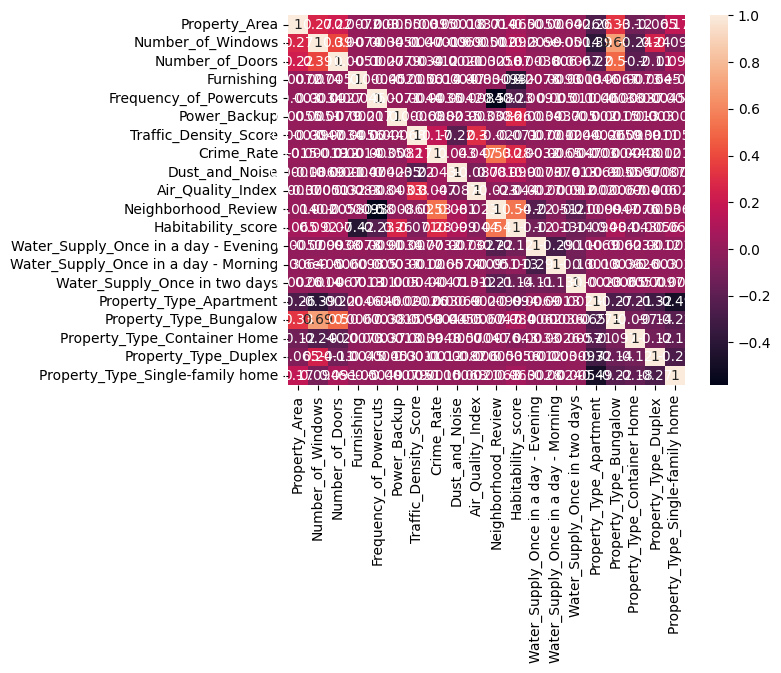

In [250]:
import seaborn as sns
cor_mat = df.corr()
sns.heatmap(cor_mat,annot=True)

In [251]:
x = df[num_col]
x = df.drop('Habitability_score',axis=1)
y=df['Habitability_score']

In [252]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [253]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [254]:
accuracy = model.score(x_test,y_test)
accuracy

0.5870477740028734